In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import re
import matplotlib.pyplot as plt
import matplotlib.axes as axes

In [2]:
from IPython.display import display

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [4]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Load HDF5 file from working directory 

In [5]:
os.chdir(r'C:\Users\Sellit\Desktop\BA_Coding\Data\1final_out')

In [6]:
start4=datetime.now()

df_out = pd.read_hdf('DataFrame_1_df_out.h5', 'df_out')

end4 = datetime.now()
print(end4 - start4)

0:00:02.512515


### Check out dataframe

In [9]:
num_of_purch_sessions = df_out[df_out['purchase']==True]['session_id'].nunique()
num_of_purch_sessions

2635

In [10]:
num_of_nonpurch_sessions = df_out[df_out['purchase']==False]['session_id'].nunique()
num_of_nonpurch_sessions

7125

In [117]:
display(df_out)

,idx,purchase,session_id,num_pages,created,lastActivity,startTime,endTime,engagementTime,visitTime,total_engagementTime,duration,page_cat,scroll,uri,websitePage,ref_gen,page_id,tags1,title,country,region,city,isp,ip,lang,userAgent,browser,browserVersion,os,osVersion,device,referrer,referrerType,first_5_pages,screenRes,tags2,variables,lng,lat,annotations,before_checkout,match,no_checkout_infirstrows
0,1,True,00122a1826fff3625372f158fcf07f28,37,2018-06-19 10:33:23.808808200,2018-06-19 11:39:53.466149600,2018-06-19 10:33:23.808808200,2018-06-19 10:33:27.437534400,3.999,3.999,696.151,5444.344,home,15.0,https://www.holzprofi24.de/?msclkid=8350d00998...,/,bing,06192376a2433129538b379727dcdb34d0343dd6,[purchase],schÃ¶n wohnen - schÃ¶n gÃ¼nstig! | Holzprofi24,de,01,Karlsruhe,#####,195.200.34.###,de,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,IE,11.0,Windows,7,Desktop,https://www.bing.com/,Search,"home,account,account,account,account",1920x1080,"[form-interact, submit, click-error, purchase]","[utm_source=bing, utm_medium=cpc, utm_term=hol...",8.4776,49.0003,[],True,False,True
1,1,True,00122a1826fff3625372f158fcf07f28,37,2018-06-19 10:33:23.808808200,2018-06-19 11:39:53.466149600,2018-06-19 10:33:29.047911400,2018-06-19 10:33:37.536911400,8.489,8.489,696.151,5444.344,account,46.0,https://www.holzprofi24.de/account,/account,bing,06192835c74029df1d4c0acdd70fe13538de43e9,"[form-interact, submit, purchase]",Registrierung | Holzprofi24,de,01,Karlsruhe,#####,195.200.34.###,de,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,IE,11.0,Windows,7,Desktop,https://www.bing.com/,Search,None,1920x1080,"[form-interact, submit, click-error, purchase]","[utm_source=bing, utm_medium=cpc, utm_term=hol...",8.4776,49.0003,[],True,True,True
2,1,True,00122a1826fff3625372f158fcf07f28,37,2018-06-19 10:33:23.808808200,2018-06-19 11:39:53.466149600,2018-06-19 10:33:38.980854200,2018-06-19 10:33:49.667854200,7.663,10.687,696.151,5444.344,account,46.0,https://www.holzprofi24.de/account/login/sTarg...,/account/login/starget/account/stargetaction/i...,bing,061938349f1bf2233b971ef351ac0363cebc7057,"[form-interact, submit, purchase]",Registrierung | Holzprofi24,de,01,Karlsruhe,#####,195.200.34.###,de,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,IE,11.0,Windows,7,Desktop,https://www.bing.com/,Search,None,1920x1080,"[form-interact, submit, click-error, purchase]","[utm_source=bing, utm_medium=cpc, utm_term=hol...",8.4776,49.0003,[],True,True,True
3,1,True,00122a1826fff3625372f158fcf07f28,37,2018-06-19 10:33:23.808808200,2018-06-19 11:39:53.466149600,2018-06-19 10:33:51.231440200,2018-06-19 10:33:53.177117000,2.119,2.119,696.151,5444.344,account,46.0,https://www.holzprofi24.de/account/login/sTarg...,/account/login/starget/account/stargetaction/i...,bing,061951931b7d5099e2d7e7eabd1918aa92c9e4c8,[purchase],Registrierung | Holzprofi24,de,01,Karlsruhe,#####,195.200.34.###,de,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,IE,11.0,Windows,7,Desktop,https://www.bing.com/,Search,None,1920x1080,"[form-interact, submit, click-error, purchase]","[utm_source=bing, utm_medium=cpc, utm_term=hol...",8.4776,49.0003,[],True,True,True
4,1,True,00122a1826fff3625372f158fcf07f28,37,2018-06-19 10:33:23.808808200,2018-06-19 11:39:53.466149600,2018-06-19 10:33:54.832661200,2018-06-19 10:34:02.216372000,7.465,7.465,696.151,5444.344,account,59.0,https://www.holzprofi24.de/account/password,/account/password,bing,0619547916f751520a99cc6ec8b9b62e7ab0f2d4,"[form-interact, submit, purchase]",Holzprofi24,de,01,Karlsruhe,#####,195.200.34.###,de,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,IE,11.0,Windows,7,Desktop,https://www.bing.com/,Search,None,1920x1080,"[form-interact, submit, click-error, purchase]","[utm_source=bing, utm_medium=cpc, utm_term=hol...",8.4776,49.0003,[],True,True,True
5,1,True,00122a1826fff3625372f158fcf07f28,37,2018-06-19 10:33:23.808808200,2018-06-19 11:39:53.466149600,2018-06-19 10:34:03.364776300,2018-06-19 10:39:52.803156500,18.489,349.452,696.151,5444.344,ac

In [118]:
df_out.describe()

,idx,num_pages,engagementTime,visitTime,total_engagementTime,duration,scroll
count,163245.000000,163245.000000,163245.000000,163245.000000,163245.000000,163245.000000,163245.000000
mean,4533.772281,29.259316,27.204166,99.102975,734.944714,2147.913327,59.044393
std,2930.181261,22.283324,33.997307,330.618064,601.994055,2391.895403,27.138185
min,1.000000,5.000000,0.000000,0.000000,7.342000,14.995000,0.000000
25%,1856.000000,12.000000,7.892000,8.014000,301.864000,511.940000,33.000000
50%,4366.000000,22.000000,17.192000,18.719000,549.864000,1330.238000,61.000000
75%,7126.000000,39.000000,33.917000,45.989000,1015.140000,2990.272000,84.000000
max,9760.000000,101.000000,1594.283000,16790.034000,5626.065000,31302.384000,100.000000


In [119]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163245 entries, 0 to 163244
Data columns (total 44 columns):
idx                        163245 non-null int32
purchase                   163245 non-null bool
session_id                 163245 non-null object
num_pages                  163245 non-null int64
created                    163245 non-null datetime64[ns]
lastActivity               163245 non-null datetime64[ns]
startTime                  163245 non-null datetime64[ns]
endTime                    163245 non-null datetime64[ns]
engagementTime             163245 non-null float64
visitTime                  163245 non-null float64
total_engagementTime       163245 non-null float64
duration                   163245 non-null float64
page_cat                   163245 non-null object
scroll                     163245 non-null float64
uri                        163245 non-null object
websitePage                163245 non-null object
ref_gen                    106363 non-null object
page_i

### Return most often used browser

In [120]:
explorer_purch = df_out[df_out['purchase']==True].groupby('session_id').head(1)['browser'].value_counts()
explorer_purch_distr = explorer_purch/num_of_purch_sessions

In [121]:
explorer_nonpurch = df_out[df_out['purchase']==False].groupby('session_id').head(1)['browser'].value_counts()
explorer_nonpurch_distr = explorer_nonpurch/num_of_nonpurch_sessions

In [122]:
num = 6

labels_purch = list(explorer_purch_distr.index)
for idx1, val1 in enumerate (labels_purch):
    if idx1 >= num:
        labels_purch[idx1] = ''
        
labels_nonpurch = list(explorer_nonpurch_distr.index)
for idx2, val2 in enumerate (labels_nonpurch):
    if idx2 >= num:
        labels_nonpurch[idx2] = ''

<Figure size 432x288 with 0 Axes>

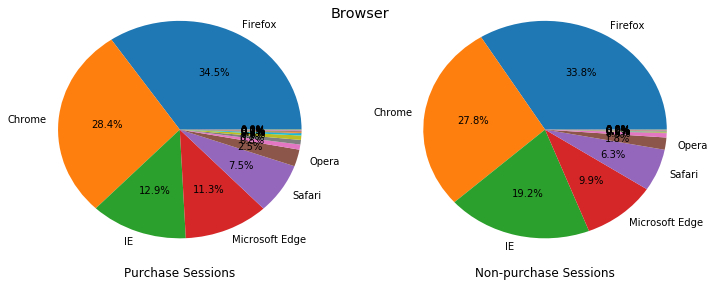

In [123]:
plt.subplots_adjust(wspace = 1)
fig = plt.figure(figsize=(12,2))

plt.suptitle('Browser', fontsize = 'x-large', x=0.51)
plt.subplot(1,2,1)
plt.pie(explorer_purch_distr, labels = labels_purch, autopct='%1.1f%%')
plt.title('Purchase Sessions',  y=-1.4)
plt.ylim(0,1)

plt.subplot(1,2,2)
plt.pie(explorer_nonpurch_distr, labels = labels_nonpurch, autopct='%1.1f%%')
plt.title('Non-purchase Sessions',  y=-1.4)
plt.ylim(0,1)

plt.show()

### Most frequent referrer

In [11]:
referrer_purch = df_out[df_out['purchase']==True].groupby('session_id').head(1)[['session_id','ref_gen']].groupby('ref_gen')['session_id'].count().sort_values(ascending=False).nlargest(20)
referrer_purch_distr = referrer_purch/num_of_purch_sessions

In [12]:
referrer_nonpurch = df_out[df_out['purchase']==False].groupby('session_id').head(1)[['session_id','ref_gen']].groupby('ref_gen')['session_id'].count().sort_values(ascending=False).nlargest(20)
referrer_nonpurch_distr = referrer_nonpurch/num_of_nonpurch_sessions

<Figure size 432x288 with 0 Axes>

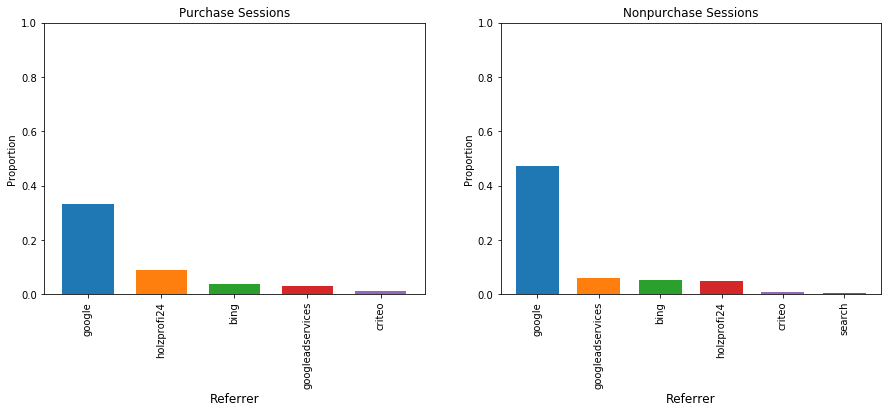

In [22]:
plt.subplots_adjust(wspace = 1)
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
referrer_purch_distr[:5].plot(kind = 'bar', width = 0.7)
plt.xlabel('Referrer', fontsize = 'large')
plt.ylabel('Proportion')
plt.title('Purchase Sessions')
plt.ylim(0,1)

plt.subplot(1,2,2)
referrer_nonpurch_distr[:6].plot(kind = 'bar', width = 0.7)
plt.xlabel('Referrer', fontsize = 'large')
plt.ylabel('Proportion')
plt.title('Nonpurchase Sessions')
plt.ylim(0,1)

plt.show()

In [127]:
num_referrer_purch = df_out[df_out['purchase']==True].groupby('session_id').head(1)[['session_id','ref_gen']].groupby('ref_gen')['session_id'].count().sum()
num_referrer_nonpurch = df_out[df_out['purchase']==False].groupby('session_id').head(1)[['session_id','ref_gen']].groupby('ref_gen')['session_id'].count().sum()

print (num_referrer_purch, 'of', num_of_purch_sessions, 'purchase sessions have a referrer')
print (num_referrer_nonpurch, 'of', num_of_nonpurch_sessions, 'non-purchase sessions have a referrer')

1405 of 2635 purchase sessions have a referrer
4798 of 7125 non-purchase sessions have a referrer


### Calculate scroll per category

In [128]:
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

In [129]:
scroll_per_cat_purch = df_out[df_out['purchase']==True].groupby('page_cat')['scroll'].agg(['mean', 'median'])
scroll_per_cat_nonpurch = df_out[df_out['purchase']==False].groupby('page_cat')['scroll'].agg(['mean', 'median'])

In [130]:
scroll_per_cat_purch

,mean,median
page_cat,,
account,66.585684,64.0
cat1,31.678955,29.0
cat2,55.425515,61.0
cat3,62.571842,70.0
checkout,72.487199,74.0
home,26.722521,16.0
info,72.755056,79.0
marken,59.862661,61.0
not assigned,67.500000,63.0


In [131]:
scroll_per_cat_nonpurch

,mean,median
page_cat,,
account,66.388693,65.0
cat1,35.520885,32.0
cat2,55.157493,60.0
cat3,62.503042,71.0
checkout,64.111919,61.0
home,29.305916,19.0
info,66.814091,67.0
marken,60.808712,63.0
not assigned,75.500000,75.5


In [25]:
df_most_important_cats = df_out[(df_out['page_cat']=='product')|(df_out['page_cat']=='cat1')|(df_out['page_cat']=='cat2')|(df_out['page_cat']=='cat3')|(df_out['page_cat']=='info')|(df_out['page_cat']=='search')|(df_out['page_cat']=='home')]

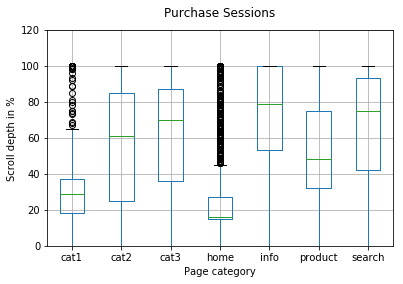

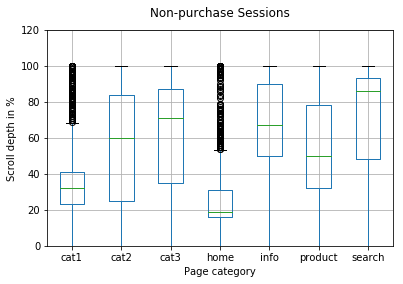

In [36]:
max_y_axis = 120

df_most_important_cats[df_most_important_cats['purchase']==True].boxplot(column='scroll', by='page_cat')
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Scroll depth in %')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Purchase Sessions')
plt.show()

df_most_important_cats[df_most_important_cats['purchase']==False].boxplot(column='scroll', by='page_cat')
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Scroll depth in %')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Non-purchase Sessions')
plt.show()

### Calculate time per category

In [24]:
time_per_cat_purch = df_out[df_out['purchase']==True].groupby('page_cat')[['engagementTime', 'visitTime']].agg(['mean', 'median'])
time_per_cat_nonpurch = df_out[df_out['purchase']==False].groupby('page_cat')[['engagementTime', 'visitTime']].agg(['mean', 'median'])

In [135]:
time_per_cat_purch

engagementTime            visitTime         
                       mean   median        mean   median
page_cat                                                 
account           19.123209  10.3465   68.947236  10.9510
cat1               7.768512   5.6100   25.530779   5.2000
cat2              20.477900  14.3500   50.804947  14.1930
cat3              22.470118  16.2440   58.734735  16.2510
checkout          37.259576  22.9350  117.651988  30.0300
home              12.322238   8.6520   95.365644  11.8400
info              32.145731  19.0840  146.655348  24.2330
marken            20.475704  13.9240   56.609515  13.7060
not assigned      13.754278   9.9415   89.124889  10.8095
notes             10.656858   6.0280   48.180839   5.9400
payment            1.361155   0.3120    4.010990   0.3070
product           41.069728  25.8940  161.966939  33.3255
rechnung          15.683333   9.7910   15.316333   9.7920
register          34.479544  23.6280  100.418750  30.9975
search            21.545308  15.2090   58.842724  15.5125

In [136]:
time_per_cat_nonpurch

engagementTime            visitTime         
                       mean   median        mean   median
page_cat                                                 
account           19.187869  10.3550   90.234011  10.3850
cat1               8.919682   6.0240   29.815141   5.8995
cat2              19.493686  13.6505   48.943477  13.6905
cat3              21.429499  15.5390   63.838325  15.5680
checkout          20.293861  12.1460  142.441362  14.9320
home              12.719535   8.4230   68.745830   8.9100
info              33.625436  15.5300  109.544494  18.5040
marken            25.513137  14.5975   65.539513  15.2285
not assigned       7.654000   7.6540    7.735000   7.7350
notes             13.908763   7.8410   61.152704   8.8760
payment            2.291048   0.4300    2.705667   0.2940
product           34.886182  23.4420  165.379465  30.0010
register          49.692167  54.9450  234.514167  99.3100
search            21.525461  16.3515   65.446642  16.7665

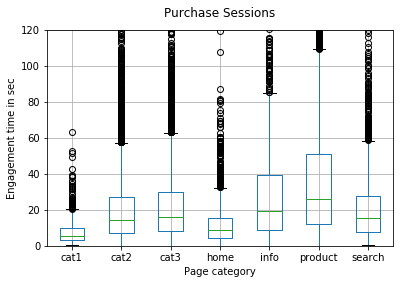

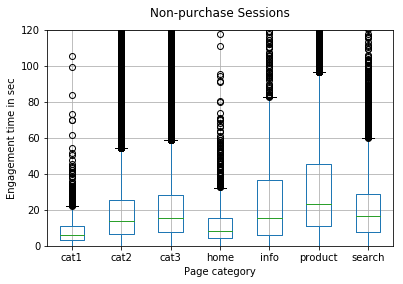

In [31]:
max_y_axis = 120

df_most_important_cats[df_most_important_cats['purchase']==True].boxplot(column='engagementTime', by='page_cat')
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Engagement time in sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Purchase Sessions')
plt.show()

df_most_important_cats[df_most_important_cats['purchase']==False].boxplot(column='engagementTime', by='page_cat')
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Engagement time in sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Non-purchase Sessions')
plt.show()

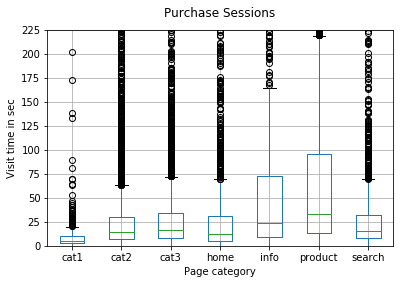

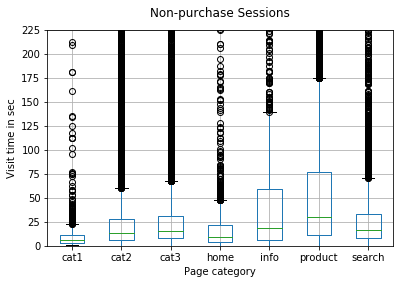

In [35]:
max_y_axis = 225

df_most_important_cats[df_most_important_cats['purchase']==True].boxplot(column='visitTime', by='page_cat')
plt.title('')
plt.xlabel('Page category')
plt.ylabel('Visit time in sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Purchase Sessions')
plt.show()

df_most_important_cats[df_most_important_cats['purchase']==False].boxplot(column='visitTime', by='page_cat')
plt.title('')
plt.xlabel('Page category',  y=-2.5)
plt.ylabel('Visit time in sec')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(6, 4)
plt.suptitle('Non-purchase Sessions')
plt.show()

### Calculate number of pages per session

In [138]:
num_pages_distr_purch = df_out[df_out['purchase']==True].groupby('session_id').head(1)['num_pages']
num_pages_distr_nonpurch = df_out[df_out['purchase']==False].groupby('session_id').head(1)['num_pages']

In [139]:
num_pages_distr_purch.agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

mean       21.990892
std        16.830611
min         5.000000
q25        11.000000
median     16.000000
q75        27.000000
max       101.000000
Name: num_pages, dtype: float64

In [140]:
num_pages_distr_nonpurch.agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

mean       14.778807
std        12.977691
min         5.000000
q25         7.000000
median     10.000000
q75        18.000000
max       100.000000
Name: num_pages, dtype: float64

<Figure size 432x288 with 0 Axes>

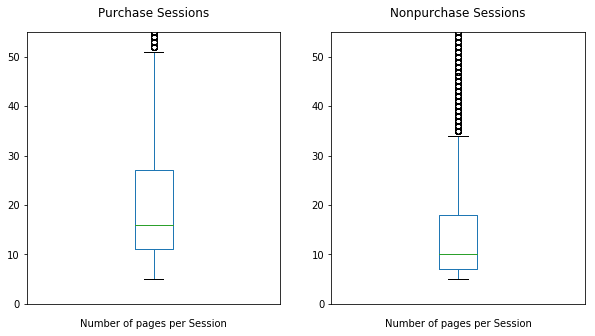

In [141]:
plt.subplots_adjust(wspace = 1)
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
num_pages_distr_purch.plot(kind = 'box')
plt.xlabel('Number of pages per Session', labelpad = 15)
plt.title('Purchase Sessions', pad = 15)
plt.tick_params(axis='x', bottom=False, labelbottom=False) 
plt.ylim(0,55)

plt.subplot(1,2,2)
num_pages_distr_nonpurch.plot(kind = 'box')
plt.xlabel('Number of pages per Session', labelpad = 15)
plt.title('Nonpurchase Sessions', pad = 15)
plt.tick_params(axis='x', bottom=False, labelbottom=False) 
plt.ylim(0,55)

plt.show()

C:\Users\Sellit\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


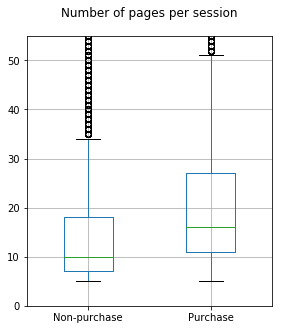

In [56]:
max_y_axis = 55

df_out.groupby('session_id').head(1).boxplot(column='num_pages', by='purchase', widths = 0.4)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(8, 5)
plt.suptitle('Number of pages per session')
plt.xticks(np.arange(1,3), ['Non-purchase', 'Purchase'])
plt.axes().set_aspect(1/25)
plt.show()

### Calculate duration per session

In [143]:
dur_per_session_distr_purch = df_out[df_out['purchase']==True].groupby('session_id').head(1)['duration']
dur_per_session_distr_nonpurch = df_out[df_out['purchase']==False].groupby('session_id').head(1)['duration']

In [144]:
dur_per_session_distr_purch.agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

mean       2032.658335
std        2064.603818
min          75.454000
q25         623.961500
median     1328.150000
q75        2762.781500
max       25764.870000
Name: duration, dtype: float64

In [145]:
dur_per_session_distr_nonpurch.agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

mean       1148.593254
std        1508.355838
min          14.995000
q25         225.356000
median      506.831000
q75        1741.049000
max       31302.384000
Name: duration, dtype: float64

C:\Users\Sellit\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


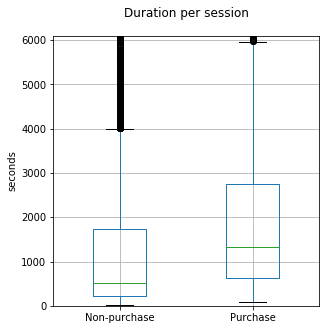

In [51]:
max_y_axis = 6100

df_out.groupby('session_id').head(1).boxplot(column='duration', by='purchase', widths = 0.4)
plt.title('')
plt.xlabel('')
plt.ylabel('seconds')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(8, 5)
plt.suptitle('Duration per session')
plt.xticks(np.arange(1,3), ['Non-purchase', 'Purchase'])
plt.axes().set_aspect(1/3000)
plt.show()

### Calculate total_engegamentTime per session

In [147]:
eng_per_session_distr_purch = df_out[df_out['purchase']==True].groupby('session_id').head(1)['total_engagementTime']
eng_per_session_distr_nonpurch = df_out[df_out['purchase']==False].groupby('session_id').head(1)['total_engagementTime']

In [148]:
eng_per_session_distr_purch.agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

mean       672.119252
std        491.275624
min         29.391000
q25        336.622500
median     529.344000
q75        867.196500
max       5626.065000
Name: total_engagementTime, dtype: float64

In [149]:
eng_per_session_distr_nonpurch.agg([np.mean, 'std', 'min', q25,'median', q75, 'max'])

mean       361.840707
std        342.503323
min          7.342000
q25        153.339000
median     256.536000
q75        446.942000
max       5087.804000
Name: total_engagementTime, dtype: float64

C:\Users\Sellit\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


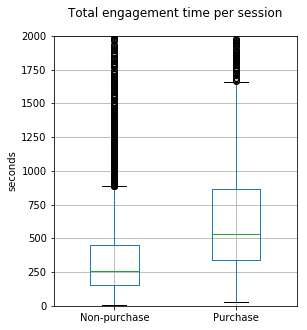

In [53]:
max_y_axis = 2000

df_out.groupby('session_id').head(1).boxplot(column='total_engagementTime', by='purchase', widths = 0.4)
plt.title('')
plt.xlabel('')
plt.ylabel('seconds')
plt.gca().set_ylim([0,max_y_axis])
plt.gcf().set_size_inches(8, 5)
plt.suptitle('Total engagement time per session')
plt.xticks(np.arange(1,3), ['Non-purchase', 'Purchase'])
plt.axes().set_aspect(1/900)
plt.show()

### Compute how many pages per category are in one session on average

In [37]:
visits_per_cat_purch = df_out[df_out['purchase']==True]['page_cat'].value_counts() 
visits_per_cat_avg_purch = visits_per_cat_purch/num_of_purch_sessions

In [38]:
visits_per_cat_nonpurch = df_out[df_out['purchase']==False]['page_cat'].value_counts() 
visits_per_cat_avg_nonpurch = visits_per_cat_nonpurch/num_of_nonpurch_sessions

<Figure size 432x288 with 0 Axes>

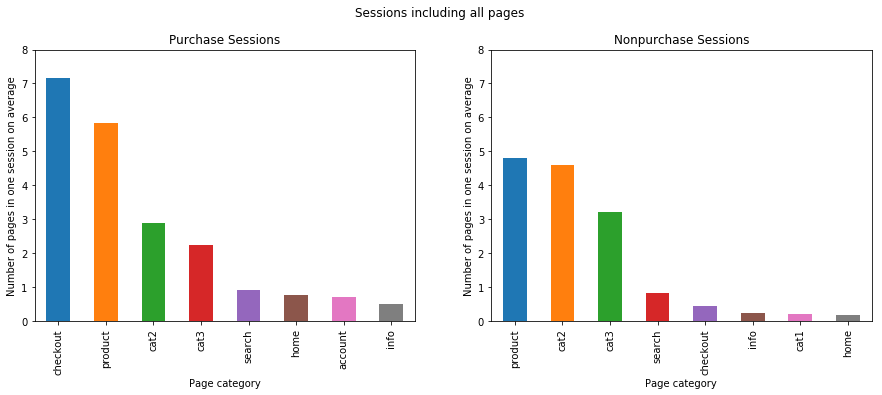

In [39]:
plt.subplots_adjust(wspace = 1)
fig = plt.figure(figsize=(15,5))

plt.suptitle('Sessions including all pages', y=1.0)
plt.subplot(1,2,1)
visits_per_cat_avg_purch[:8].plot(kind = 'bar')
plt.xlabel('Page category')
plt.ylabel('Number of pages in one session on average')
plt.title('Purchase Sessions')
plt.ylim(0,8)

plt.subplot(1,2,2)
visits_per_cat_avg_nonpurch[:8].plot(kind = 'bar')
plt.xlabel('Page category')
plt.ylabel('Number of pages in one session on average')
plt.title('Nonpurchase Sessions')
plt.ylim(0,8)

plt.show()

### Sessions without checkout pages

In [58]:
df_without_checkout = df_out[(df_out['page_cat']!='checkout')&(df_out['page_cat']!='payment')]

In [59]:
visits_per_cat_purch_no_checkout = df_without_checkout[df_without_checkout['purchase']==True]['page_cat'].value_counts() 
visits_per_cat_avg_purch_no_checkout = visits_per_cat_purch_no_checkout/num_of_purch_sessions

In [60]:
visits_per_cat_nonpurch_no_checkout = df_without_checkout[df_without_checkout['purchase']==False]['page_cat'].value_counts() 
visits_per_cat_avg_nonpurch_no_checkout = visits_per_cat_nonpurch_no_checkout/num_of_nonpurch_sessions

<Figure size 432x288 with 0 Axes>

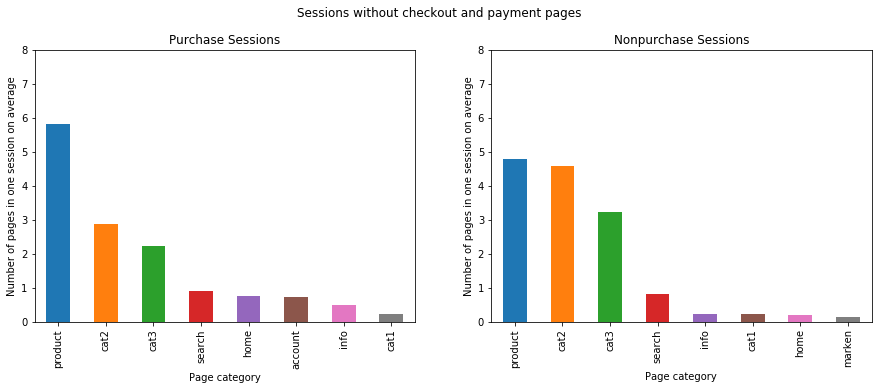

In [61]:
plt.subplots_adjust(wspace = 1)
fig = plt.figure(figsize=(15,5))

plt.suptitle('Sessions without checkout and payment pages', y=1.0)
plt.subplot(1,2,1)
visits_per_cat_avg_purch_no_checkout[:8].plot(kind = 'bar')
plt.xlabel('Page category')
plt.ylabel('Number of pages in one session on average')
plt.title('Purchase Sessions')
plt.ylim(0,8)

plt.subplot(1,2,2)
visits_per_cat_avg_nonpurch_no_checkout[:8].plot(kind = 'bar')
plt.xlabel('Page category')
plt.ylabel('Number of pages in one session on average')
plt.title('Nonpurchase Sessions')
plt.ylim(0,8)

plt.show()

### Entry page 

In [158]:
entry_page_distr_purch = df_out[df_out['purchase']==True].groupby('session_id').head(1).groupby(['page_cat'])['session_id'].count().sort_values(ascending=False)/num_of_purch_sessions
entry_page_distr_nonpurch = df_out[df_out['purchase']==False].groupby('session_id').head(1).groupby(['page_cat'])['session_id'].count().sort_values(ascending=False)/num_of_nonpurch_sessions

In [159]:
entry_page_distr_purch

page_cat
product    0.474004
home       0.271727
cat2       0.136243
cat3       0.075522
cat1       0.012144
search     0.008729
account    0.007970
info       0.006072
marken     0.003795
notes      0.002277
payment    0.001518
Name: session_id, dtype: float64

In [160]:
entry_page_distr_nonpurch

page_cat
product    0.356351
cat2       0.340351
cat3       0.155649
home       0.109474
cat1       0.010947
marken     0.009965
info       0.009544
search     0.006596
notes      0.000561
account    0.000561
Name: session_id, dtype: float64

##### Plot

In [161]:
num = 4

labels_purch = list(entry_page_distr_purch.index)
for idx1, val1 in enumerate (labels_purch):
    if idx1 >= num:
        labels_purch[idx1] = ''
        
labels_nonpurch = list(entry_page_distr_nonpurch.index)
for idx2, val2 in enumerate (labels_nonpurch):
    if idx2 >= num:
        labels_nonpurch[idx2] = ''

<Figure size 432x288 with 0 Axes>

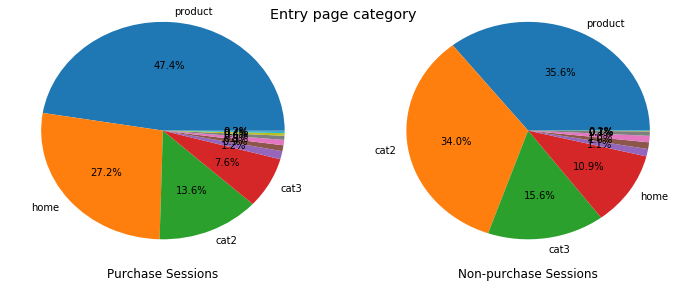

In [162]:
plt.subplots_adjust(wspace = 1)
fig = plt.figure(figsize=(12,2))

plt.suptitle('Entry page category', fontsize = 'x-large', x=0.51)
plt.subplot(1,2,1)
plt.pie(entry_page_distr_purch, labels = labels_purch, autopct='%1.1f%%')
plt.title('Purchase Sessions',  y=-1.4)
plt.ylim(0,1)

plt.subplot(1,2,2)
plt.pie(entry_page_distr_nonpurch, labels = labels_nonpurch, autopct='%1.1f%%')
plt.title('Non-purchase Sessions',  y=-1.4)
plt.ylim(0,1)

plt.show()

### Pages before checkout

In [163]:
df_before_checkout = df_out[df_out['before_checkout'] == True]

In [164]:
visits_per_cat_bef_checkout_purch = df_before_checkout[df_before_checkout['purchase']==True]['page_cat'].value_counts() 
visits_per_cat_bef_checkout_nonpurch = df_before_checkout[df_before_checkout['purchase']==False]['page_cat'].value_counts() 

In [165]:
visits_per_cat_bef_checkout_avg_purch = visits_per_cat_bef_checkout_purch/num_of_purch_sessions
visits_per_cat_bef_checkout_avg_nonpurch = visits_per_cat_bef_checkout_nonpurch/num_of_nonpurch_sessions

In [166]:
visits_per_cat_bef_checkout_avg_purch

product         3.675522
cat2            1.798861
cat3            1.565465
search          0.564326
home            0.338520
account         0.184440
info            0.133586
cat1            0.124478
marken          0.053890
notes           0.046679
payment         0.006452
not assigned    0.000380
register        0.000380
Name: page_cat, dtype: float64

In [167]:
visits_per_cat_bef_checkout_avg_nonpurch

product         4.351439
cat2            4.323509
cat3            3.023439
search          0.781333
cat1            0.207298
info            0.200281
home            0.169404
marken          0.138667
account         0.025965
notes           0.019789
not assigned    0.000140
payment         0.000140
Name: page_cat, dtype: float64

##### Plot

In [168]:
num = 5

labels_purch = list(visits_per_cat_bef_checkout_avg_purch.index)
for idx1, val1 in enumerate (labels_purch):
    if idx1 >= num:
        labels_purch[idx1] = ''
        
labels_nonpurch = list(visits_per_cat_bef_checkout_avg_nonpurch.index)
for idx2, val2 in enumerate (labels_nonpurch):
    if idx2 >= num:
        labels_nonpurch[idx2] = ''

<Figure size 432x288 with 0 Axes>

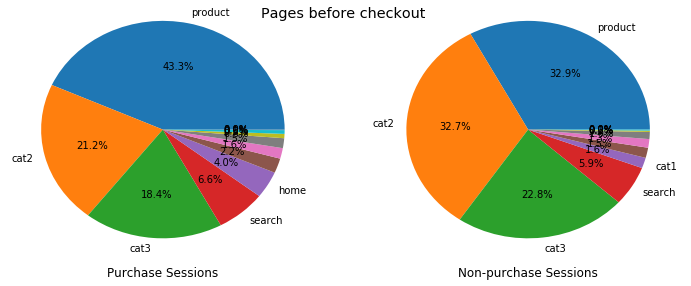

In [169]:
plt.subplots_adjust(wspace = 1)
fig = plt.figure(figsize=(12,2))

plt.suptitle('Pages before checkout', fontsize = 'x-large', x=0.51)
plt.subplot(1,2,1)
plt.pie(visits_per_cat_bef_checkout_avg_purch, labels = labels_purch, autopct='%1.1f%%')
plt.title('Purchase Sessions',  y=-1.4)
plt.ylim(0,1)

plt.subplot(1,2,2)
plt.pie(visits_per_cat_bef_checkout_avg_nonpurch, labels = labels_nonpurch, autopct='%1.1f%%')
plt.title('Non-purchase Sessions',  y=-1.4)
plt.ylim(0,1)

plt.show()

### Sessions with no checkout in first rows

In [170]:
df_out_head = df_out.groupby('session_id').head(1)

In [171]:
df_out_head_without_checkout = df_out_head[df_out_head['first_5_pages'].str.contains('checkout|payment')==False]

In [172]:
list_sessions_without_checkout_infirstrows = list(df_out_head_without_checkout.groupby('session_id', as_index=False)['startTime'].count()['session_id'])

list_purch_sessions_without_checkout_infirstrows = list(df_out_head_without_checkout[df_out_head_without_checkout['purchase']==True].groupby('session_id', as_index=False)['startTime'].count()['session_id'])
list_nonpurch_sessions_without_checkout_infirstrows = list(df_out_head_without_checkout[df_out_head_without_checkout['purchase']==False].groupby('session_id', as_index=False)['startTime'].count()['session_id'])

In [173]:
len(list_purch_sessions_without_checkout_infirstrows)

1427

In [174]:
len(list_nonpurch_sessions_without_checkout_infirstrows)

6723

In [175]:
list_true = [True] * len(list_sessions_without_checkout_infirstrows)
no_checkout_dict =dict(zip(list_sessions_without_checkout_infirstrows, list_true))
df_out['no_checkout_infirstrows'] = df_out.set_index(['session_id']).index.map(no_checkout_dict.get)
df_out['no_checkout_infirstrows'] = df_out['no_checkout_infirstrows'].fillna(False)